**Group Name: Teen Titans GO**

**Team Members:**

Dimitari Gjorgievski - dgjor2

Yashwi Shah - yshah33

Dona Maria - dmari21

Janki Patel - Jpate305

Pratik Patel - ppate460

Project Repo - https://github.com/ppate460/CS418_Group11

Github Link (.ipynb) - https://github.com/ppate460/CS418_Group11/blob/main/ProgressReport.ipynb



**Stock Prediction For Fortune 500**

**Project introduction:**

Our project aims to provide precise predictive analysis tailored to Fortune 500 companies in the United States for 2024 based on the data from 2011 to 2023. To Predict this, we collected comprehensive dataset including Rank, Company Name, Sector, Industry, Revenue, Profit, and Stock Price, as well as key economic indicators such as Unemployment Rate, Tax, Financial Ratio, and GDP.

This is important because accurate stock predictions empower investors to make wise decisions about whether to buy, sell, or hold—potentially leading to significant financial profits. Also, these predictions play a big role in navigating the risks of an unpredictable market and economic crisis. This is important to all of us as these predictions affect employment, the economy, and our cost of living. Increased spending is correlated with a larger employment market and more opportunities. These companies are of great interest to investors, which makes precise prediction crucial.

**Changes since the proposal:**

Including sector and industry data was a major addition to our plan. We felt it was necessary to include this information in order to make more accurate predictions. We have also moved from collecting stock price data quarterly to monthly. This adjustment enables more detailed analysis and timely insights into market fluctuations.

Another important change that we made was the span of the data. Initially, we had acquired data ranging from 1986-2023, but later we had to adjust it to 2011-2023. The reason for this was the APIs we are using to acquire additional data do not allow us to go far back in history.

**Data Collection**


Our analysis of Fortune 500 companies is based on a dataset spanning 13 years from 2011 to 2023. Each file includes important data points like Rank, Company Name, Sector, Industry, Revenue, Profit, and Stock Price on a monthly basis. This information allows us to gain insights into the financial standing and market performance of these companies. By organizing companies into different sectors, we can examine trends and patterns in performance within various industries. This categorization allows for more in-depth analysis and helps us reach significant conclusions about dynamics unique to each sector. Moreover, we have integrated macroeconomic indicators such as the Unemployment Rate, Tax, Financial Ratio, and GDP to provide a holistic perspective. This broad contextualization enhances our grasp of the diverse factors impacting company performance and market trends.

Data Description:



*   Rank (numerical): The numerical position of the company within the Fortune 500 list.
*   Company Name (Text): The name of the Fortune 500 company.
*   Sector (Categorical): The broad category or industry sector to which the company belongs.
*   Industry (Categorical): The specific field or niche within the sector that the company operates in.
*   Revenue(numerical): The total income generated by the company over a specific period.
*   Profit (numerical): The net income after deducting expenses from revenue.
*   Stock Price (numerical): The monthly closing price of the company's stock over the course of a year (monthly m1 - m12 with opening and closing price).
*   GDP (numerical): The Gross Domestic Product, a measure of the economic performance of a country.
*   Unemployment Rate (numerical): The percentage of the labor force that is unemployed and actively seeking employment.
*   Producer Price Index (numerical): A measure of the average change in selling prices received by domestic producers for their output.
*   Consumer Price Index (numerical): A measure of the average change over time in the prices paid by urban consumers for a market basket of consumer goods and services.

Source:

We used web scraping techniques to extract rank, company name, revenue, and profit data from a GitHub repository. Yahoo Finance provided sector and industry data, which was extracted using web scraping methods as well. Furthermore, stock price (open and close) data for monthly intervals (January - December) was obtained from the Polygon API, providing detailed insights into these companies' market performance. By combining data from multiple sources and using a variety of data acquisition methods, we ensure an effective and comprehensive dataset for our Fortune 500 predictive analysis.



**Exploartory Data Analysis**

Our data currently has some missing values and some of the formatting for the features are not consistent (dollar signs and commas, as well as parenthesis are present in some of the numerical and categorical features)

In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
import csv


# Mount Google Drive if not already mounted
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
directory_path = '/content/drive/MyDrive/CS418_Project/data'

# Read CSV files into DataFrames
data_2020 = pd.DataFrame(pd.read_csv(directory_path + '/rank_name_symbol_2020.csv'))
data_2021 = pd.DataFrame(pd.read_csv(directory_path + '/rank_name_symbol_2021.csv'))
data_2022 = pd.DataFrame(pd.read_csv(directory_path + '/rank_name_symbol_2022.csv'))
data_2023 = pd.DataFrame(pd.read_csv(directory_path + '/rank_name_symbol_2023.csv'))

data_2020

,Rank,Name,Ticker,Sector,Industry,Revenue,Profit,m1-o,m1-c,m2-o,...,m8-o,m8-c,m9-o,m9-c,m10-o,m10-c,m11-o,m11-c,m12-o,m12-c
0,1,Walmart,WMT,Consumer Defensive,Discount Stores,"523,964.00","14,881.00",39.62,38.1633,38.300,...,43.3033,46.2833,47.0667,46.6367,46.9333,46.2500,46.8633,50.930,51.200,48.0500
1,2,Amazon.com,AMZN,Consumer Cyclical,Internet Retail,"280,522.00","11,588.00",93.75,100.4360,100.530,...,159.0255,172.5480,174.4790,157.4365,160.4000,151.8075,153.0870,158.402,159.425,162.8465
2,3,Exxon Mobil,XOM,Energy,Oil & Gas Integrated,"264,938.00","14,340.00",70.24,62.1200,61.380,...,42.0500,39.9400,39.7500,34.3300,33.7900,32.6200,33.1400,38.130,38.960,41.2200
3,4,Apple,AAPL,Technology,Consumer Electronics,"260,174.00","55,256.00",74.06,77.3775,76.075,...,108.2000,129.0400,132.7600,115.8100,117.6400,108.8600,109.1100,119.050,121.010,132.6900
4,5,CVS Health,CVS,Healthcare,Healthcare Plans,"256,776.00","6,634.00",74.65,67.8200,68.400,...,63.4500,62.1200,62.0100,58.4000,58.4300,56.0900,56.8700,67.790,68.390,68.3000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,Crown Castle International,CCI,Real Estate,REIT - Specialty,"5,763.00",860,142.33,149.8400,150.680,...,165.9300,163.2500,162.5100,166.5000,166.7500,156.2000,157.4500,167.570,168.000,159.1900
496,497,Simon Property Group,SPG,Real Estate,REIT - Retail,"5,755.20","2,101.60",149.41,133.1500,133.380,...,61.2100,67.8500,66.6500,64.6800,64.8400,62.8100,62.9600,82.570,84.650,85.2800
497,498,Cerner,CERN,NaN,NaN,"5,692.60",529.5,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
498,499,Post Holdings,POST,Consumer Defensive,Packaged Foods,"5,681.10",124.7,109.24,104.5700,105.190,...,89.1400,88.0200,87.6500,86.0000,86.3000,85.9000,86.9200,94.460,95.430,101.0100


In [ ]:
#Formatting data

# Remove commas from the 'Profit' column
data_2020['Profit'] = data_2020.loc[:,'Profit'].str.replace(',', '')
data_2021['Profit'] = data_2021.loc[:,'Profit'].str.replace(',', '')
data_2022['Profit'] = data_2022.loc[:,'Profit'].str.replace(',', '')
data_2023['Profit'] = data_2023.loc[:,'Profit'].str.replace(',', '')

# Remove $ from the 'Profit' column
data_2020['Profit'] = data_2020.loc[:,'Profit'].str.replace('$', '')
data_2021['Profit'] = data_2021.loc[:,'Profit'].str.replace('$', '')
data_2022['Profit'] = data_2022.loc[:,'Profit'].str.replace('$', '')
data_2023['Profit'] = data_2023.loc[:,'Profit'].str.replace('$', '')

# Remove () from the 'Profit' column
data_2020['Profit'] = data_2020.loc[:,'Profit'].str.replace(')', '')
data_2021['Profit'] = data_2021.loc[:,'Profit'].str.replace(')', '')
data_2022['Profit'] = data_2022.loc[:,'Profit'].str.replace(')', '')
data_2023['Profit'] = data_2023.loc[:,'Profit'].str.replace(')', '')
data_2020['Profit'] = data_2020.loc[:,'Profit'].str.replace('(', '')
data_2021['Profit'] = data_2021.loc[:,'Profit'].str.replace('(', '')
data_2022['Profit'] = data_2022.loc[:,'Profit'].str.replace('(', '')
data_2023['Profit'] = data_2023.loc[:,'Profit'].str.replace('(', '')

# Convert the 'Profit' column to float
data_2020['Profit'] = data_2020.loc[:,'Profit'].astype(float)
data_2021['Profit'] = data_2021.loc[:,'Profit'].astype(float)
data_2022['Profit'] = data_2022.loc[:,'Profit'].astype(float)
data_2023['Profit'] = data_2023.loc[:,'Profit'].astype(float)

# Remove commas from the 'Revenue' column
data_2020['Revenue'] = data_2020.loc[:,'Revenue'].str.replace(',', '')
data_2021['Revenue'] = data_2021.loc[:,'Revenue'].str.replace(',', '')
data_2022['Revenue'] = data_2022.loc[:,'Revenue'].str.replace(',', '')
data_2023['Revenue'] = data_2023.loc[:,'Revenue'].str.replace(',', '')

# Remove $ from the 'Revenue' column
data_2020['Revenue'] = data_2020.loc[:,'Revenue'].str.replace('$', '')
data_2021['Revenue'] = data_2021.loc[:,'Revenue'].str.replace('$', '')
data_2022['Revenue'] = data_2022.loc[:,'Revenue'].str.replace('$', '')
data_2023['Revenue'] = data_2023.loc[:,'Revenue'].str.replace('$', '')

# Convert the 'Revenue' column to float
data_2020['Revenue'] = data_2020.loc[:,'Revenue'].astype(float)
data_2021['Revenue'] = data_2021.loc[:,'Revenue'].astype(float)
data_2022['Revenue'] = data_2022.loc[:,'Revenue'].astype(float)
data_2023['Revenue'] = data_2023.loc[:,'Revenue'].astype(float)


# Convert the Stocks columns to float
data_2020.loc[:, 'm1-o':'m12-c'] = data_2020.loc[:, 'm1-o':'m12-c'].astype(float)
data_2021.loc[:, 'm1-o':'m12-c'] = data_2021.loc[:, 'm1-o':'m12-c'].astype(float)
data_2022.loc[:, 'm1-o':'m12-c'] = data_2022.loc[:, 'm1-o':'m12-c'].astype(float)
data_2023.loc[:, 'm1-o':'m12-c'] = data_2023.loc[:, 'm1-o':'m12-c'].astype(float)


# Convert the columns of string type
data_2020.loc[:, 'Name':'Industry'] = data_2020.loc[:, 'Name':'Industry'].astype(str)
data_2021.loc[:, 'Name':'Industry'] = data_2021.loc[:, 'Name':'Industry'].astype(str)
data_2022.loc[:, 'Name':'Industry'] = data_2022.loc[:, 'Name':'Industry'].astype(str)
data_2023.loc[:, 'Name':'Industry'] = data_2023.loc[:, 'Name':'Industry'].astype(str)

In [ ]:
data_2020

,Rank,Name,Ticker,Sector,Industry,Revenue,Profit,m1-o,m1-c,m2-o,...,m8-o,m8-c,m9-o,m9-c,m10-o,m10-c,m11-o,m11-c,m12-o,m12-c
0,1,Walmart,WMT,Consumer Defensive,Discount Stores,523964.0,14881.0,39.62,38.1633,38.300,...,43.3033,46.2833,47.0667,46.6367,46.9333,46.2500,46.8633,50.930,51.200,48.0500
1,2,Amazon.com,AMZN,Consumer Cyclical,Internet Retail,280522.0,11588.0,93.75,100.4360,100.530,...,159.0255,172.5480,174.4790,157.4365,160.4000,151.8075,153.0870,158.402,159.425,162.8465
2,3,Exxon Mobil,XOM,Energy,Oil & Gas Integrated,264938.0,14340.0,70.24,62.1200,61.380,...,42.0500,39.9400,39.7500,34.3300,33.7900,32.6200,33.1400,38.130,38.960,41.2200
3,4,Apple,AAPL,Technology,Consumer Electronics,260174.0,55256.0,74.06,77.3775,76.075,...,108.2000,129.0400,132.7600,115.8100,117.6400,108.8600,109.1100,119.050,121.010,132.6900
4,5,CVS Health,CVS,Healthcare,Healthcare Plans,256776.0,6634.0,74.65,67.8200,68.400,...,63.4500,62.1200,62.0100,58.4000,58.4300,56.0900,56.8700,67.790,68.390,68.3000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,Crown Castle International,CCI,Real Estate,REIT - Specialty,5763.0,860.0,142.33,149.8400,150.680,...,165.9300,163.2500,162.5100,166.5000,166.7500,156.2000,157.4500,167.570,168.000,159.1900
496,497,Simon Property Group,SPG,Real Estate,REIT - Retail,5755.2,2101.6,149.41,133.1500,133.380,...,61.2100,67.8500,66.6500,64.6800,64.8400,62.8100,62.9600,82.570,84.650,85.2800
497,498,Cerner,CERN,nan,nan,5692.6,529.5,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
498,499,Post Holdings,POST,Consumer Defensive,Packaged Foods,5681.1,124.7,109.24,104.5700,105.190,...,89.1400,88.0200,87.6500,86.0000,86.3000,85.9000,86.9200,94.460,95.430,101.0100


In [ ]:
# Data Imputation
# Drop rows where any of the specified columns have null values
data_2020_cleaned = data_2020.dropna()
data_2021_cleaned = data_2021.dropna()
data_2022_cleaned = data_2022.dropna()
data_2023_cleaned = data_2023.dropna()

data_2020_cleaned

,Rank,Name,Ticker,Sector,Industry,Revenue,Profit,m1-o,m1-c,m2-o,...,m8-o,m8-c,m9-o,m9-c,m10-o,m10-c,m11-o,m11-c,m12-o,m12-c
0,1,Walmart,WMT,Consumer Defensive,Discount Stores,523964.0,14881.0,39.62,38.1633,38.300,...,43.3033,46.2833,47.0667,46.6367,46.9333,46.2500,46.8633,50.930,51.200,48.0500
1,2,Amazon.com,AMZN,Consumer Cyclical,Internet Retail,280522.0,11588.0,93.75,100.4360,100.530,...,159.0255,172.5480,174.4790,157.4365,160.4000,151.8075,153.0870,158.402,159.425,162.8465
2,3,Exxon Mobil,XOM,Energy,Oil & Gas Integrated,264938.0,14340.0,70.24,62.1200,61.380,...,42.0500,39.9400,39.7500,34.3300,33.7900,32.6200,33.1400,38.130,38.960,41.2200
3,4,Apple,AAPL,Technology,Consumer Electronics,260174.0,55256.0,74.06,77.3775,76.075,...,108.2000,129.0400,132.7600,115.8100,117.6400,108.8600,109.1100,119.050,121.010,132.6900
4,5,CVS Health,CVS,Healthcare,Healthcare Plans,256776.0,6634.0,74.65,67.8200,68.400,...,63.4500,62.1200,62.0100,58.4000,58.4300,56.0900,56.8700,67.790,68.390,68.3000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,495,Levi Strauss,LEVI,Consumer Cyclical,Apparel Manufacturing,5763.1,394.6,19.33,19.6400,18.610,...,12.1800,12.3200,12.3000,13.4000,13.6400,15.7800,15.9900,18.390,18.710,20.0800
495,496,Crown Castle International,CCI,Real Estate,REIT - Specialty,5763.0,860.0,142.33,149.8400,150.680,...,165.9300,163.2500,162.5100,166.5000,166.7500,156.2000,157.4500,167.570,168.000,159.1900
496,497,Simon Property Group,SPG,Real Estate,REIT - Retail,5755.2,2101.6,149.41,133.1500,133.380,...,61.2100,67.8500,66.6500,64.6800,64.8400,62.8100,62.9600,82.570,84.650,85.2800
498,499,Post Holdings,POST,Consumer Defensive,Packaged Foods,5681.1,124.7,109.24,104.5700,105.190,...,89.1400,88.0200,87.6500,86.0000,86.3000,85.9000,86.9200,94.460,95.430,101.0100


**Visualizations**

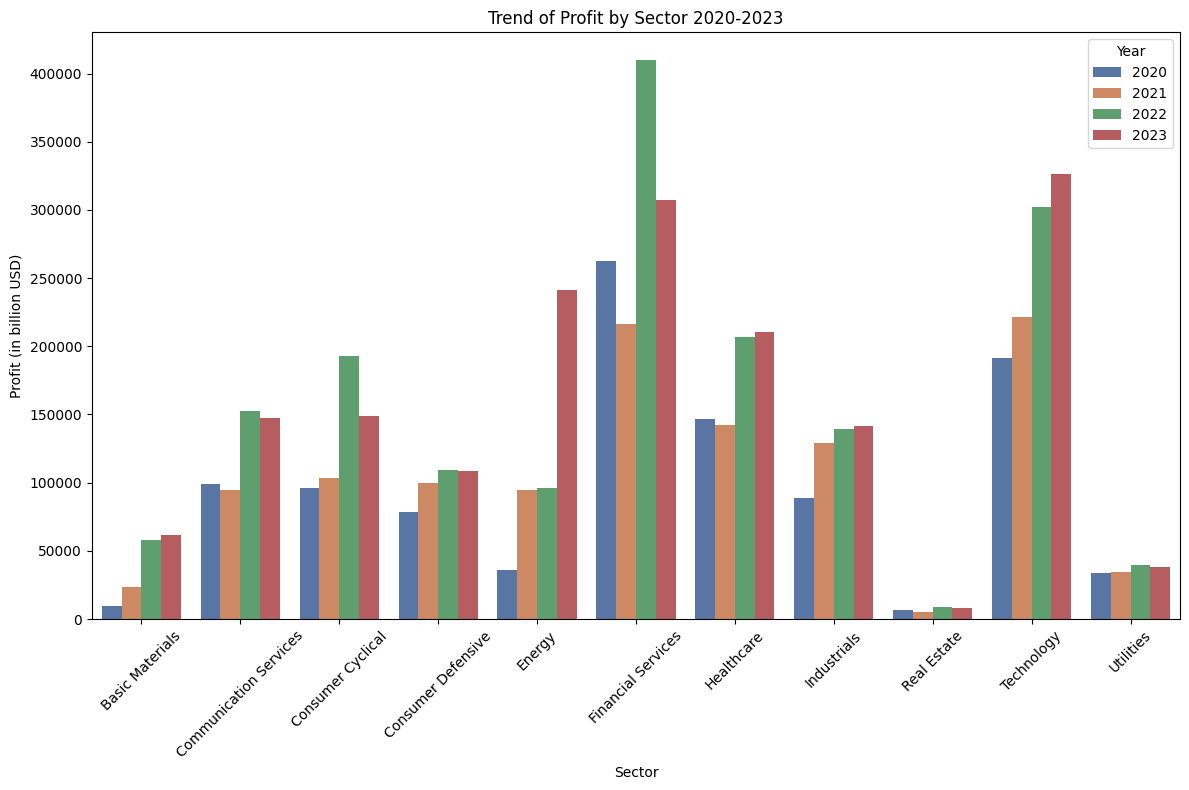

In [ ]:
#Visualization 1 (Janki & Dimitar)

sector_data_2020 = data_2020_cleaned.groupby('Sector').agg({'Profit': 'sum'}).reset_index()
sector_data_2021 = data_2021_cleaned.groupby('Sector').agg({'Profit': 'sum'}).reset_index()
sector_data_2022 = data_2022_cleaned.groupby('Sector').agg({'Profit': 'sum'}).reset_index()
sector_data_2023 = data_2023_cleaned.groupby('Sector').agg({'Profit': 'sum'}).reset_index()


def plot_combined_profit_by_sector_bar(sector_data_dict, palette):
    plt.figure(figsize=(12, 8))

    # Concatenate all years data for plotting
    all_data = pd.DataFrame()
    for year, sector_data in sector_data_dict.items():
        sector_data['Year'] = year  # Add a column for the year
        all_data = pd.concat([all_data, sector_data])

    # Plot the bar chart for revenue
    sns.barplot(x='Sector', y='Profit', hue='Year', data=all_data, errorbar=None, palette=palette)

    plt.xticks(rotation=45)
    plt.title('Trend of Profit by Sector 2020-2023')
    plt.ylabel('Profit (in billion USD)')
    plt.xlabel('Sector')
    plt.legend(title='Year')
    plt.tight_layout()
    plt.show()

# Assuming sector_data_2020, sector_data_2021, sector_data_2022, sector_data_2023 are already defined
sector_data_dict = {
    2020: sector_data_2020,
    2021: sector_data_2021,
    2022: sector_data_2022,
    2023: sector_data_2023
}

# Define the palette before calling the function
palette = 'deep'  # Replace 'deep' with your chosen palette

plot_combined_profit_by_sector_bar(sector_data_dict, palette)


A trend analysis of earnings across sectors from 2020 to 2023, makes a strong case for the Technology sector's growth and resilience in the face of varying economic situations that may have been impacted by the pandemic and market changes. This theory is especially noteworthy since it suggests that society and economic institutions are shifting and becoming more reliant on technology and digital services. This is being driven by the widespread trend of remote labor, digital transformation, and e-commerce. Examining this theory is essential because it could provide information about long-term strategic investments and sustainable growth in the IT sector, which could have an impact on policy-making, workforce development, and education. As the analyst in charge, a comprehensive evaluation of the sector's performance, growth sustainability, and its inter-sectoral impacts would be imperative, necessitating a blend of data analytics, sector expertise, and economic forecasting to fully understand the implications for the future economy.

In [ ]:
#Visualization 2 (Yashwi & Dona):
dataframes = []

for year in range(2011, 2024):
    filename = f"/content/drive/MyDrive/CS418_Project/Fortune500Data/updated_rank_name_symbol/rank_name_symbol_{year}.csv"  # Replace 'path_to_your_folder' with the actual path
    df = pd.read_csv(filename)
    dataframes.append(df)

# List to store sector-wise average ranks for each year
sector_performance_by_year = []

for df in dataframes:
    sector_performance = df['Sector'].value_counts()
    # Normalize sector names
    sector_performance.index = sector_performance.index.str.title()
    sector_performance_by_year.append(sector_performance)

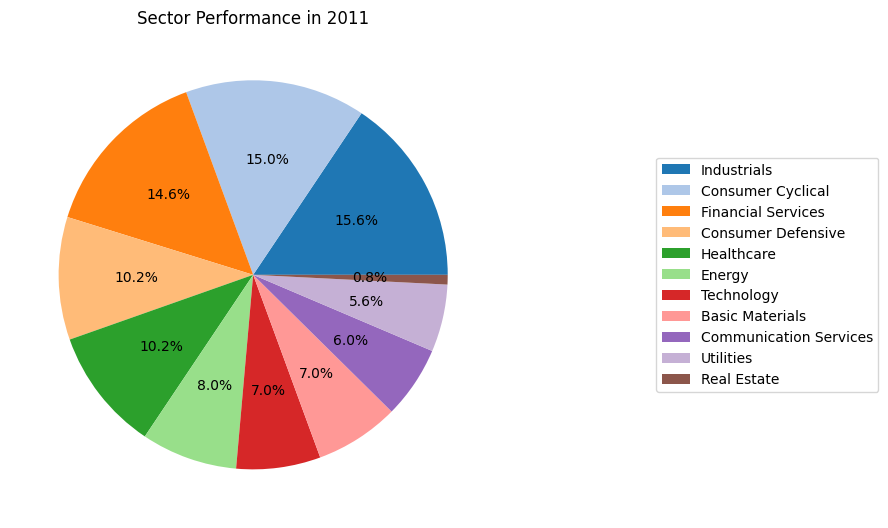

In [ ]:
palette = sns.color_palette("tab20", n_colors=11)
year = 2011
sector_performance = sector_performance_by_year[year - 2011]  # Index adjustment
fig, ax = plt.subplots(figsize=(8, 6))
patches, texts, autotexts = ax.pie(sector_performance, autopct='%1.1f%%', colors=palette)
ax.set_title(f'Sector Performance in {year}')
ax.legend(patches, sector_performance.index, loc="center right", bbox_to_anchor=(1.3, 0, 0.5, 1))
plt.tight_layout()
plt.show()

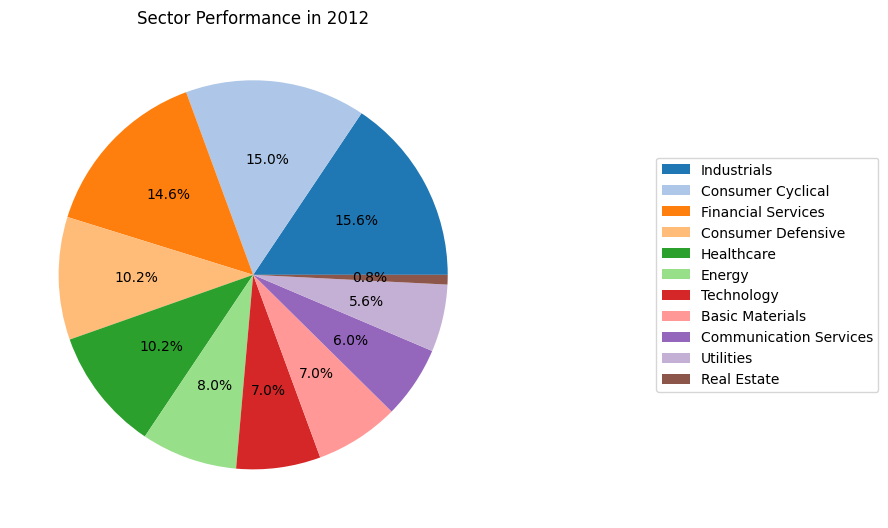

In [ ]:
year = 2012
sector_performance = sector_performance_by_year[year - 2012]  # Index adjustment
fig, ax = plt.subplots(figsize=(8, 6))
patches, texts, autotexts = ax.pie(sector_performance, autopct='%1.1f%%', colors=palette)
ax.set_title(f'Sector Performance in {year}')
ax.legend(patches, sector_performance.index, loc="center right", bbox_to_anchor=(1.3, 0, 0.5, 1))
plt.tight_layout()
plt.show()

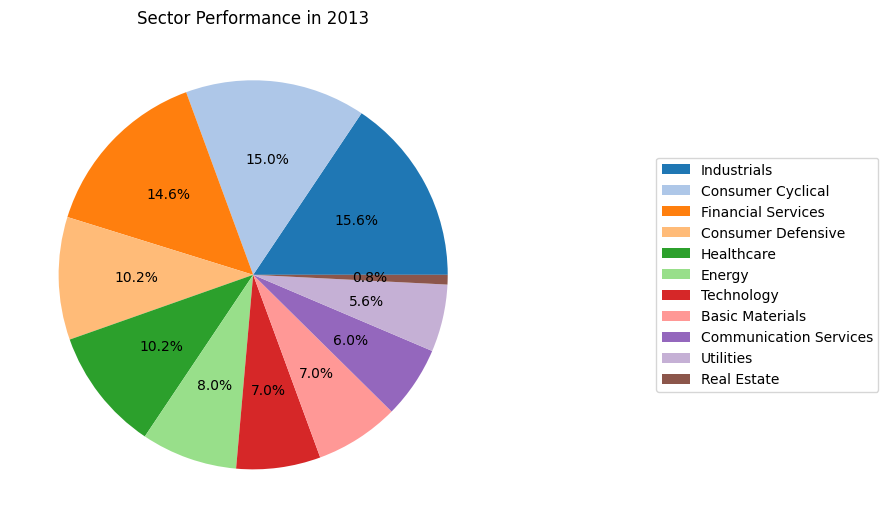

In [ ]:
year = 2013
sector_performance = sector_performance_by_year[year - 2013]  # Index adjustment
fig, ax = plt.subplots(figsize=(8, 6))
patches, texts, autotexts = ax.pie(sector_performance, autopct='%1.1f%%', colors=palette)
ax.set_title(f'Sector Performance in {year}')
ax.legend(patches, sector_performance.index, loc="center right", bbox_to_anchor=(1.3, 0, 0.5, 1))
plt.tight_layout()
plt.show()

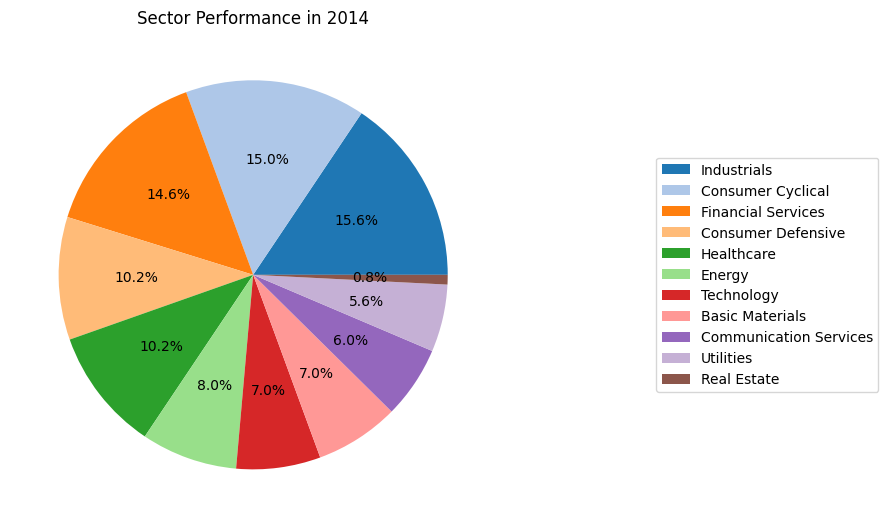

In [ ]:
year = 2014
sector_performance = sector_performance_by_year[year - 2014]  # Index adjustment
fig, ax = plt.subplots(figsize=(8, 6))
patches, texts, autotexts = ax.pie(sector_performance, autopct='%1.1f%%', colors=palette)
ax.set_title(f'Sector Performance in {year}')
ax.legend(patches, sector_performance.index, loc="center right", bbox_to_anchor=(1.3, 0, 0.5, 1))
plt.tight_layout()
plt.show()

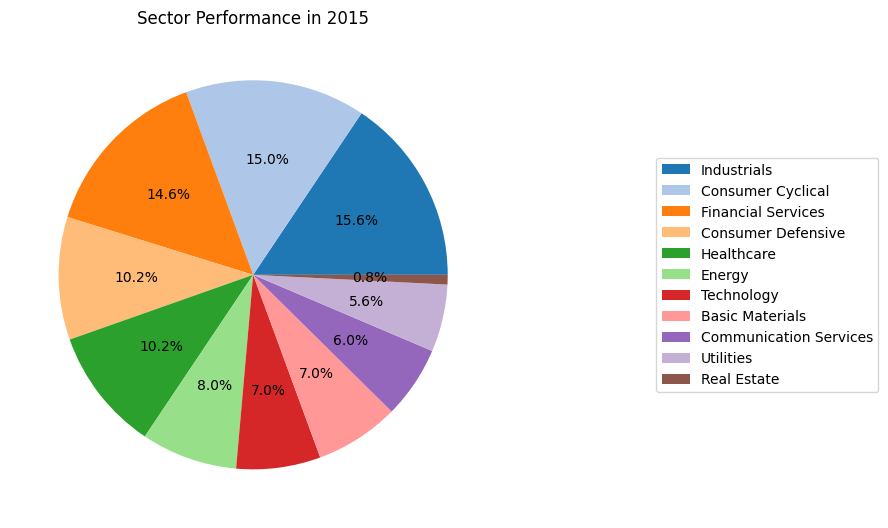

In [ ]:
year = 2015
sector_performance = sector_performance_by_year[year - 2015]  # Index adjustment
fig, ax = plt.subplots(figsize=(8, 6))
patches, texts, autotexts = ax.pie(sector_performance, autopct='%1.1f%%', colors=palette)
ax.set_title(f'Sector Performance in {year}')
ax.legend(patches, sector_performance.index, loc="center right", bbox_to_anchor=(1.3, 0, 0.5, 1))
plt.tight_layout()
plt.show()

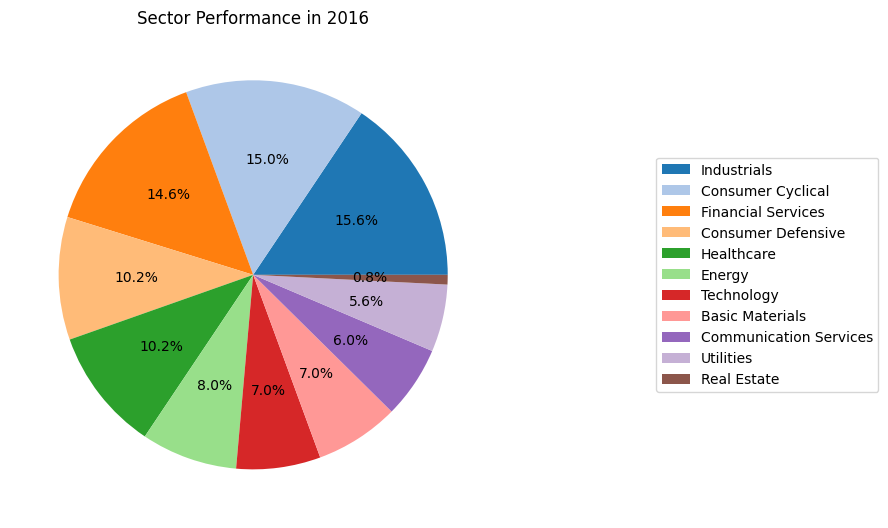

In [ ]:
year = 2016
sector_performance = sector_performance_by_year[year - 2016]  # Index adjustment
fig, ax = plt.subplots(figsize=(8, 6))
patches, texts, autotexts = ax.pie(sector_performance, autopct='%1.1f%%', colors=palette)
ax.set_title(f'Sector Performance in {year}')
ax.legend(patches, sector_performance.index, loc="center right", bbox_to_anchor=(1.3, 0, 0.5, 1))
plt.tight_layout()
plt.show()

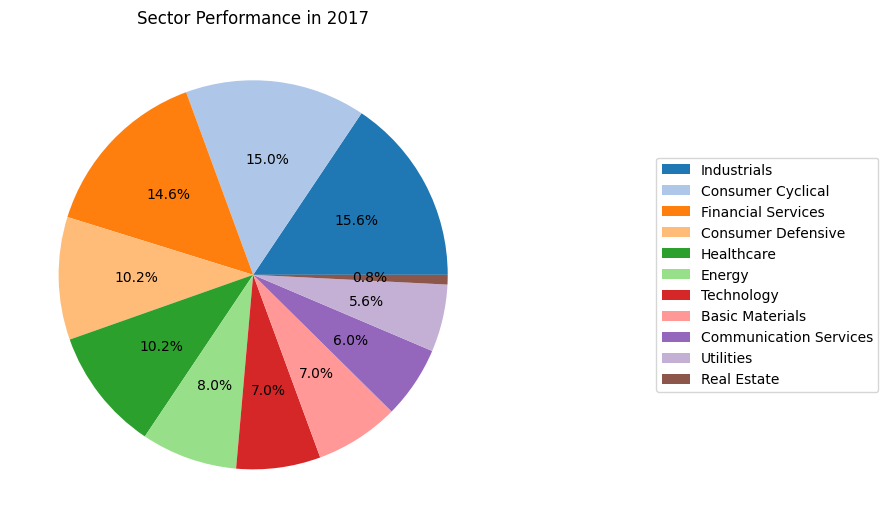

In [ ]:
year = 2017
sector_performance = sector_performance_by_year[year - 2017]  # Index adjustment
fig, ax = plt.subplots(figsize=(8, 6))
patches, texts, autotexts = ax.pie(sector_performance, autopct='%1.1f%%', colors=palette)
ax.set_title(f'Sector Performance in {year}')
ax.legend(patches, sector_performance.index, loc="center right", bbox_to_anchor=(1.3, 0, 0.5, 1))
plt.tight_layout()
plt.show()

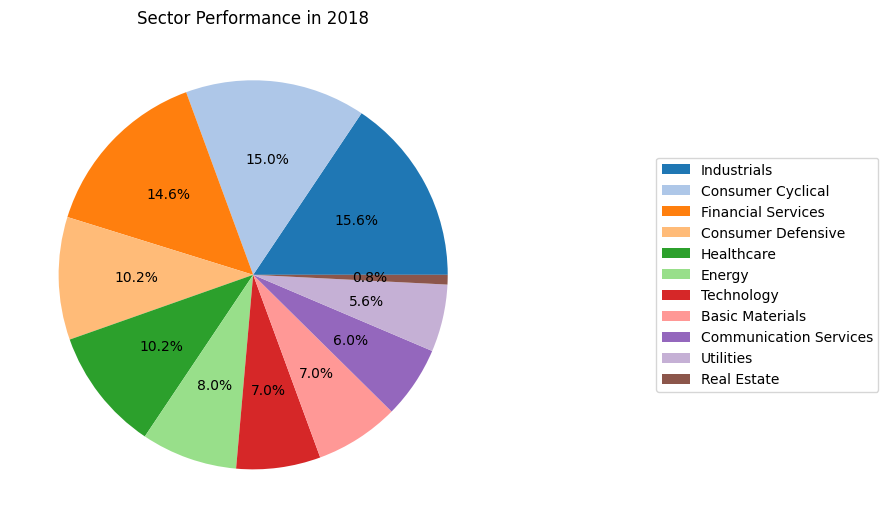

In [ ]:
year = 2018
sector_performance = sector_performance_by_year[year - 2018]  # Index adjustment
fig, ax = plt.subplots(figsize=(8, 6))
patches, texts, autotexts = ax.pie(sector_performance, autopct='%1.1f%%', colors=palette)
ax.set_title(f'Sector Performance in {year}')
ax.legend(patches, sector_performance.index, loc="center right", bbox_to_anchor=(1.3, 0, 0.5, 1))
plt.tight_layout()
plt.show()

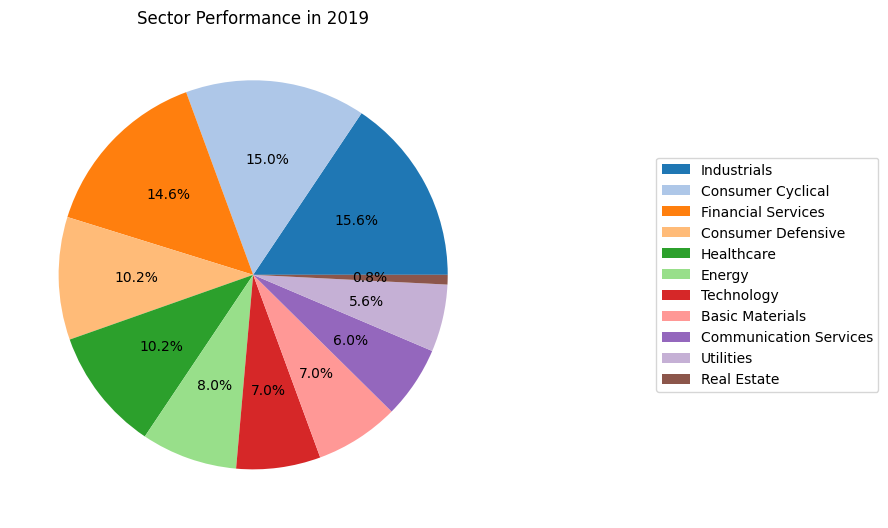

In [ ]:
year = 2019
sector_performance = sector_performance_by_year[year - 2019]  # Index adjustment
fig, ax = plt.subplots(figsize=(8, 6))
patches, texts, autotexts = ax.pie(sector_performance, autopct='%1.1f%%', colors=palette)
ax.set_title(f'Sector Performance in {year}')
ax.legend(patches, sector_performance.index, loc="center right", bbox_to_anchor=(1.3, 0, 0.5, 1))
plt.tight_layout()
plt.show()

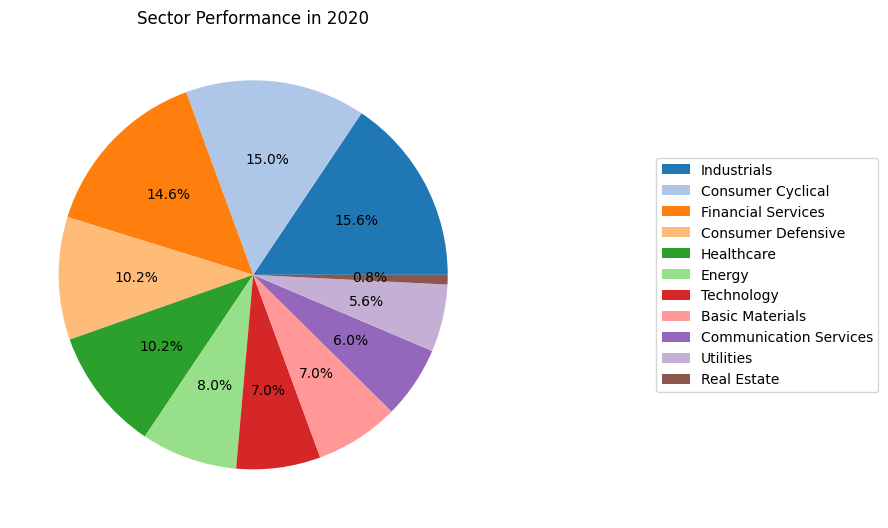

In [ ]:
year = 2020
sector_performance = sector_performance_by_year[year - 2020]  # Index adjustment
fig, ax = plt.subplots(figsize=(8, 6))
patches, texts, autotexts = ax.pie(sector_performance, autopct='%1.1f%%', colors=palette)
ax.set_title(f'Sector Performance in {year}')
ax.legend(patches, sector_performance.index, loc="center right", bbox_to_anchor=(1.3, 0, 0.5, 1))
plt.tight_layout()
plt.show()

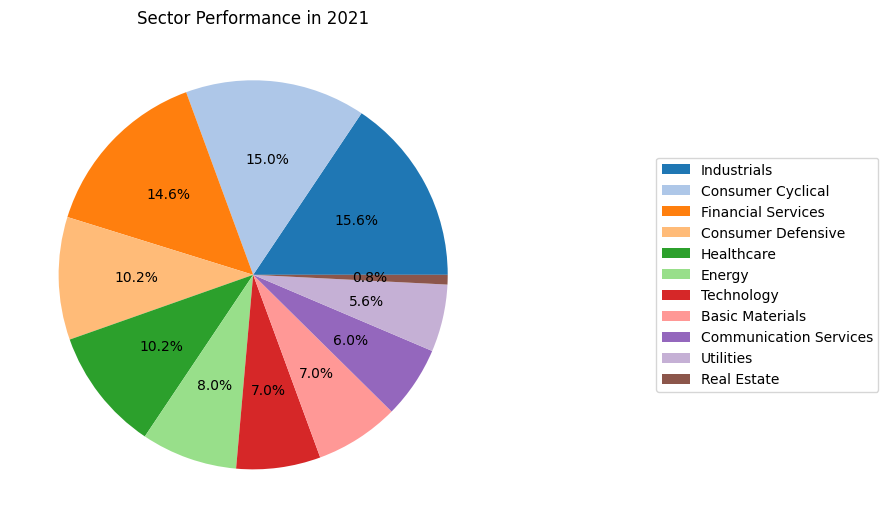

In [ ]:
year = 2021
sector_performance = sector_performance_by_year[year - 2021]  # Index adjustment
fig, ax = plt.subplots(figsize=(8, 6))
patches, texts, autotexts = ax.pie(sector_performance, autopct='%1.1f%%', colors=palette)
ax.set_title(f'Sector Performance in {year}')
ax.legend(patches, sector_performance.index, loc="center right", bbox_to_anchor=(1.3, 0, 0.5, 1))
plt.tight_layout()
plt.show()

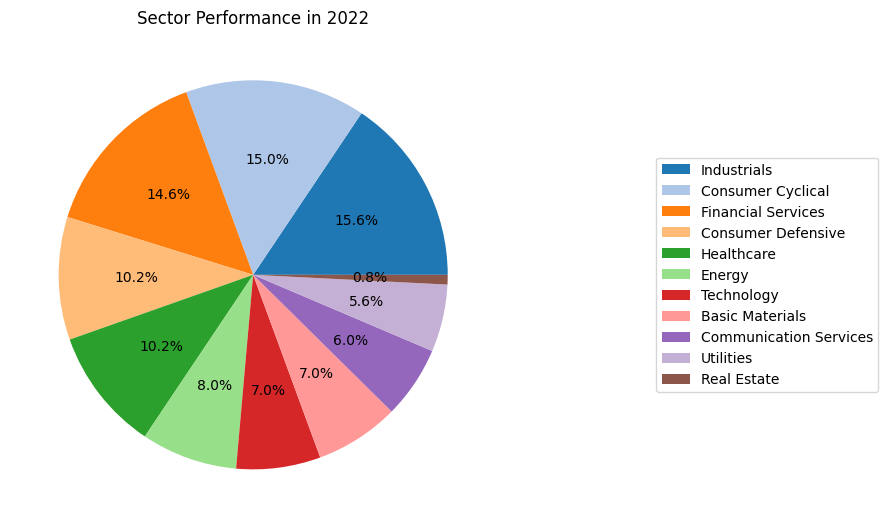

In [ ]:
year = 2022
sector_performance = sector_performance_by_year[year - 2022]  # Index adjustment
fig, ax = plt.subplots(figsize=(8, 6))
patches, texts, autotexts = ax.pie(sector_performance, autopct='%1.1f%%', colors=palette)
ax.set_title(f'Sector Performance in {year}')
ax.legend(patches, sector_performance.index, loc="center right", bbox_to_anchor=(1.3, 0, 0.5, 1))
plt.tight_layout()
plt.show()

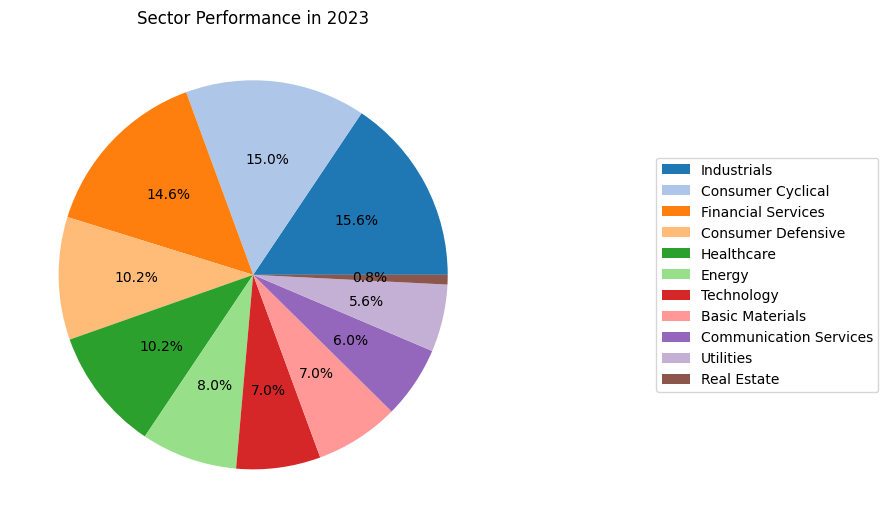

In [ ]:
year = 2023
sector_performance = sector_performance_by_year[year - 2023]  # Index adjustment
fig, ax = plt.subplots(figsize=(8, 6))
patches, texts, autotexts = ax.pie(sector_performance, autopct='%1.1f%%', colors=palette)
ax.set_title(f'Sector Performance in {year}')
ax.legend(patches, sector_performance.index, loc="center right", bbox_to_anchor=(1.3, 0, 0.5, 1))
plt.tight_layout()
plt.show()

We collected sector information for the years 2011-2023 for the Fortune 500 companies and created pie charts for each year to illustrate the distribution of companies that secured positions on the Fortune 500 list.
The trend from 2011 to 2023 reveals a clear pattern: consumer cyclical or financial services companies constantly dominates the Fortune 500 rankings and in recent years, consumer cyclical companies have grown in prominence. Real estate companies, on the other hand, appear to be struggling, indicating potential difficulties or limitations in the sector. This is interesting as the consistent presence of consumer cyclical companies at the top raises the possibility that these companies excel because of their ability to anticipate and respond to shifting consumer preferences and market conditions. Sectors that struggle to achieve top rankings, such as real estate, might be because of the impact of economic cycles, or shifts in demand on their performance.

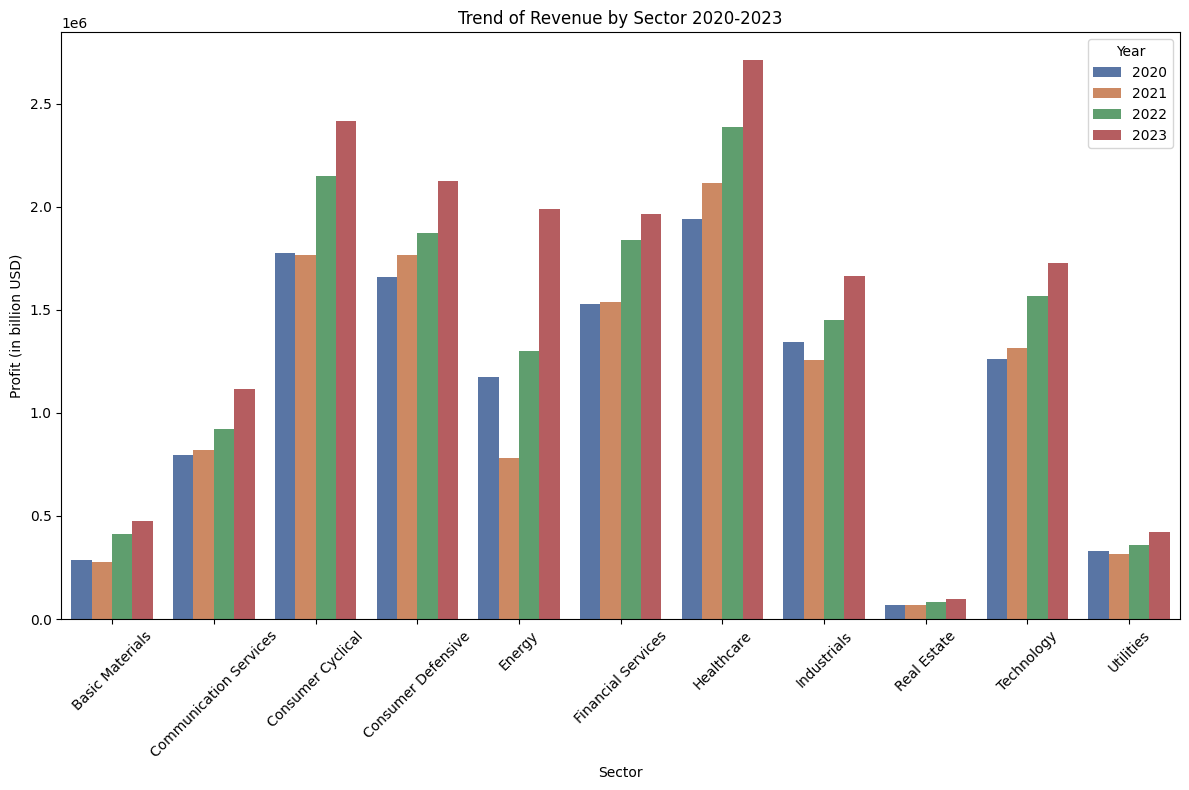

In [ ]:
#Visualization 3 (Janki)

sector_data_2020 = data_2020_cleaned.groupby('Sector').agg({'Revenue': 'sum'}).reset_index()
sector_data_2021 = data_2021_cleaned.groupby('Sector').agg({'Revenue': 'sum'}).reset_index()
sector_data_2022 = data_2022_cleaned.groupby('Sector').agg({'Revenue': 'sum'}).reset_index()
sector_data_2023 = data_2023_cleaned.groupby('Sector').agg({'Revenue': 'sum'}).reset_index()


def plot_combined_profit_by_sector_bar(sector_data_dict, palette):
    plt.figure(figsize=(12, 8))

    # Concatenate all years data for plotting
    all_data = pd.DataFrame()
    for year, sector_data in sector_data_dict.items():
        sector_data['Year'] = year  # Add a column for the year
        all_data = pd.concat([all_data, sector_data])

    # Plot the bar chart for revenue
    sns.barplot(x='Sector', y='Revenue', hue='Year', data=all_data, errorbar=None, palette=palette)

    plt.xticks(rotation=45)
    plt.title('Trend of Revenue by Sector 2020-2023')
    plt.ylabel('Profit (in billion USD)')
    plt.xlabel('Sector')
    plt.legend(title='Year')
    plt.tight_layout()
    plt.show()

# Assuming sector_data_2020, sector_data_2021, sector_data_2022, sector_data_2023 are already defined
sector_data_dict = {
    2020: sector_data_2020,
    2021: sector_data_2021,
    2022: sector_data_2022,
    2023: sector_data_2023
}

# Define the palette before calling the function
palette = 'deep'  # Replace 'deep' with your chosen palette

plot_combined_profit_by_sector_bar(sector_data_dict, palette)

The revenue trend for each sector from 2020 to 2023. This graphic raises an intriguing theory: in 2021, the Energy sector saw an abnormally high revenue peak, in contrast to other sectors that did not see such a sharp increase. This peak may be the result of a number of causes, including variations in the price of energy globally, modifications to energy policy, a rise in demand, or a mix of these.
Examining this theory is intriguing because it may provide light on the underlying political and economic forces that will influence the energy industry in particular in 2021. For the purpose of making future decisions about energy investments, sustainability initiatives, and energy production plans, it is imperative that investors, policymakers, and companies operating in the sector have a thorough understanding of these dynamics. Additionally, this research may aid in predicting such patterns or becoming ready for future market volatility. It's a useful study that illustrates how outside variables can have a rapid and significant impact on industry-specific economics, telling the story of how market performance and world events interact.


GDP Data columns: Index(['Year - Month', 'Monthly Real GDP Index'], dtype='object')
Unemployment Data columns: Index(['DATE', 'UNRATE'], dtype='object')


<ipython-input-445-a8590e62e5b1>:16: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  gdp_data[gdp_date_column] = pd.to_datetime(gdp_data[gdp_date_column], infer_datetime_format=True)
<ipython-input-445-a8590e62e5b1>:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  gdp_data[gdp_date_column] = pd.to_datetime(gdp_data[gdp_date_column], infer_datetime_format=True)


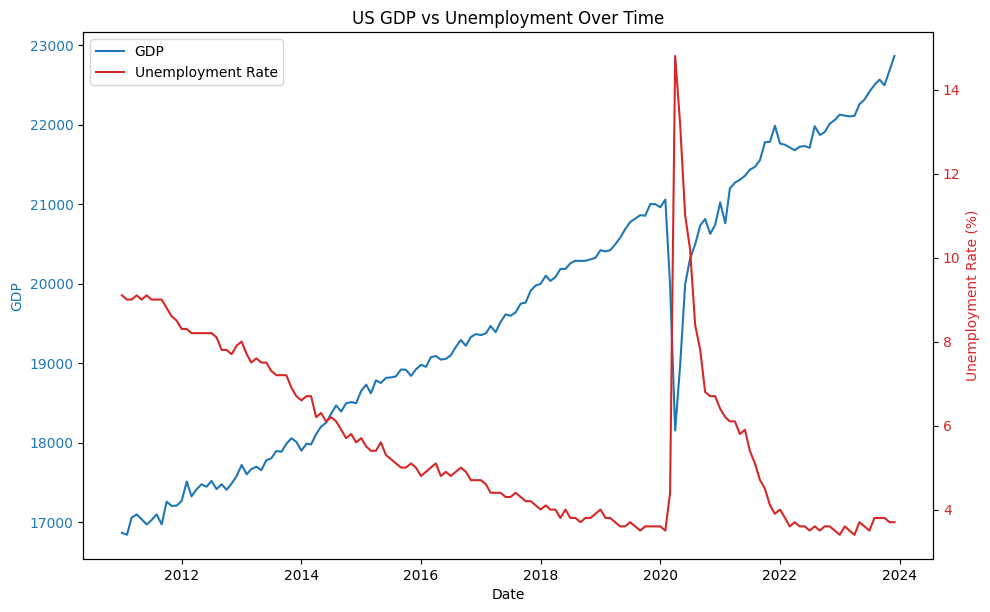

In [ ]:
#Visualization 4 (Pratik)

# Load the data
gdp_data = pd.read_csv(directory_path + '/USMonthlyGDP-2011-2023.csv')
unemployment_data = pd.read_csv(directory_path + '/UnemploymentRate2011-2023.csv')

# Print the column names to check
print("GDP Data columns:", gdp_data.columns)
print("Unemployment Data columns:", unemployment_data.columns)

# Define date columns
gdp_date_column = 'Year - Month'
unemployment_date_column = 'DATE'

# Convert date columns to datetime format
gdp_data[gdp_date_column] = pd.to_datetime(gdp_data[gdp_date_column], infer_datetime_format=True)
unemployment_data[unemployment_date_column] = pd.to_datetime(unemployment_data[unemployment_date_column])

# Extract month and year for merging
gdp_data['Month'] = gdp_data[gdp_date_column].dt.month
gdp_data['Year'] = gdp_data[gdp_date_column].dt.year
unemployment_data['Month'] = unemployment_data[unemployment_date_column].dt.month
unemployment_data['Year'] = unemployment_data[unemployment_date_column].dt.year

# Merge the datasets on month and year
merged_data = pd.merge(gdp_data, unemployment_data, on=['Month', 'Year'], suffixes=('_gdp', '_unemployment'))

fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('GDP', color=color)
ax1.plot(merged_data[gdp_date_column], merged_data['Monthly Real GDP Index'], color=color, label='GDP')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Unemployment Rate (%)', color=color)
ax2.plot(merged_data[unemployment_date_column], merged_data['UNRATE'], color=color, label='Unemployment Rate')
ax2.tick_params(axis='y', labelcolor=color)

# Adding legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

fig.tight_layout()
plt.title('US GDP vs Unemployment Over Time')
plt.show()

The relationship between GDP (Gross Domestic Product) and the Unemployment Rate is crucial for understanding the overall health of the economy.
This visualization shows the relationship between the US GDP in terms of value and the US Unemployment Rate over the period 2011-2023. By analyzing the graph, we can make a conclusion that there is an inverse relationship between these two variables. When the economic growth is robust and businesses are expanding rapidly, it results in a decline in the unemployment rate. If the GDP is increasing steadily while the unemployment rate is decreasing, it suggests a healthy economy with strong job creation which is exactly the case in our last 13 years of data represented. There was a clear spike in the unemployment rate during the pandemic which can be noticed just by looking at the graph and in the exact time frame, the GDP experienced a steep decline in terms of value which suggests an inverse relationship. So these two variables are crucial to predict the overall health of the economy moving forward.


<ipython-input-446-c95c18a52f53>:51: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  handles, labels = legendObj.legendHandles, legendObj.texts


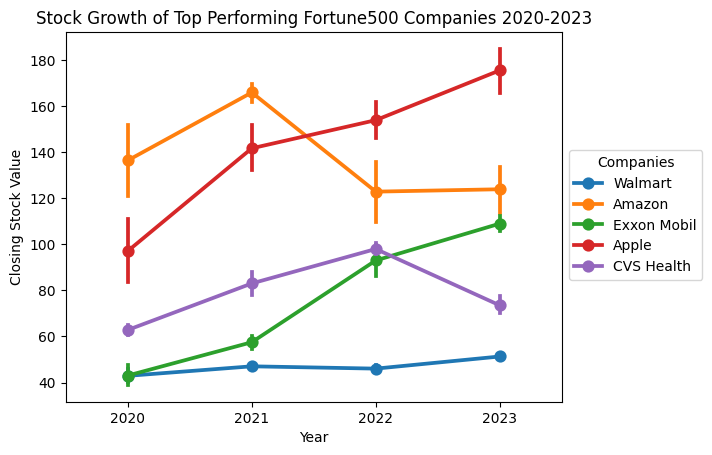

In [ ]:
#Visualization 5 (Dimitar)

tickers_of_interest = ['WMT', 'AMZN', 'AAPL', 'XOM', 'CVS']

df_subset_2020 = data_2020_cleaned[data_2020_cleaned['Ticker'].isin(tickers_of_interest)]
df_subset_2021 = data_2021_cleaned[data_2021_cleaned['Ticker'].isin(tickers_of_interest)]
df_subset_2022 = data_2022_cleaned[data_2022_cleaned['Ticker'].isin(tickers_of_interest)]
df_subset_2023 = data_2023_cleaned[data_2023_cleaned['Ticker'].isin(tickers_of_interest)]

df_combined = pd.concat([df_subset_2020, df_subset_2021, df_subset_2022, df_subset_2023])
df_combined = df_combined.drop(['Rank', 'Name', 'Sector', 'Industry', 'Revenue', 'Profit'], axis=1)

columns = ['Year', 'Month', 'Stock Open', 'Stock Close', 'Company']
empty_df = pd.DataFrame(columns=columns)
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
years = [2020, 2021, 2022, 2023]
company = list(df_combined['Ticker'])

j = 0
i = 0
for y in years:
  for c in range(5):
    for m in months:
      empty_df.at[j, 'Year'] = y
      empty_df.at[j, 'Month'] = m
      j+=1

open = True

for index, row in df_combined.iterrows():
  ro = 0
  comp = row['Ticker']
  for r in row:
    if ro>0:
      if open == True:
        open = False;
        empty_df.at[i, 'Stock Open'] = r
      else:
        open = True;
        empty_df.at[i, 'Stock Close'] = r
        empty_df.at[i, 'Company'] = comp
        i+=1
    ro+=1

plt = sns.pointplot(data=empty_df, x="Year", y='Stock Close', hue="Company")
plt.set_ylabel('Closing Stock Value')
plt.set_title('Stock Growth of Top Performing Fortune500 Companies 2020-2023')
legendObj = plt.legend(bbox_to_anchor=(1, -0.3, 1, 1), loc='upper left')#.set_loc("right"))
legendObj.set_title("Companies")
legendObj.set_frame_on(True)
handles, labels = legendObj.legendHandles, legendObj.texts
for t, label in zip(labels, ["Walmart", "Amazon", "Exxon Mobil", "Apple", "CVS Health"]):
    t.set_text(label)

This visualization was done by taking the monthly stocks data from 2020-2023 of some of the companies that are consistently within the top 10 of the Fortune500 for the given years. We can see from this graph that the stock price itself does not have a direct correlation to where the company finds itself on the list, meaning has the highest revenue. Take Walmart for example, it is number 1 on the Fortune500 consistently from 2020 to 2023, but its stock price is the lowest. However, we can see that its stock is pretty stable and is even rising from 2022 to 2023. Could that be a factor? That is something we should consider within further analysing the data through ML models, once we have stock data for the rest of the years before 2020.

**ML Analyses**

In [ ]:
#ML Analysis 1 (Yashwi & Dona)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

sector_performance_by_year = []

for df in dataframes:
    sector_performance = df['Sector'].value_counts()
    # Normalize sector names
    sector_performance.index = sector_performance.index.str.title()
    sector_performance_by_year.append(sector_performance)

combined_data = pd.concat(sector_performance_by_year, axis=1)

# Prepare the training data
X = combined_data.iloc[:, :-1]  # Features (counts of companies in each sector for years up to 2023)
Y = combined_data.iloc[:, -1]   # Target (counts of companies in each sector for 2023)

# Splitting data into train and test sets (80% train, 20% test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Splitting train set into train and validation sets (60% train, 20% validation)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.25, random_state=42)

# Initialize and train logistic regression model
logistic_reg = LogisticRegression(max_iter=1000)
logistic_reg.fit(X_train, Y_train)

#Prediction
val_predict = logistic_reg.predict(X_val)
test_predict = logistic_reg.predict(X_test)

val_score = logistic_reg.score(X_val, val_predict)
test_score = logistic_reg.score(X_test, test_predict)

print(f"Validation Set Accuracy: {val_score}")
print(f"Test Set Accuracy: {test_score}")

#Since we don't have data for 2024, let's assume X_test is data for 2024
predicted_performance_2024 = logistic_reg.predict(X_train)
sectors = combined_data.index

Validation Set Accuracy: 1.0
Test Set Accuracy: 1.0


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


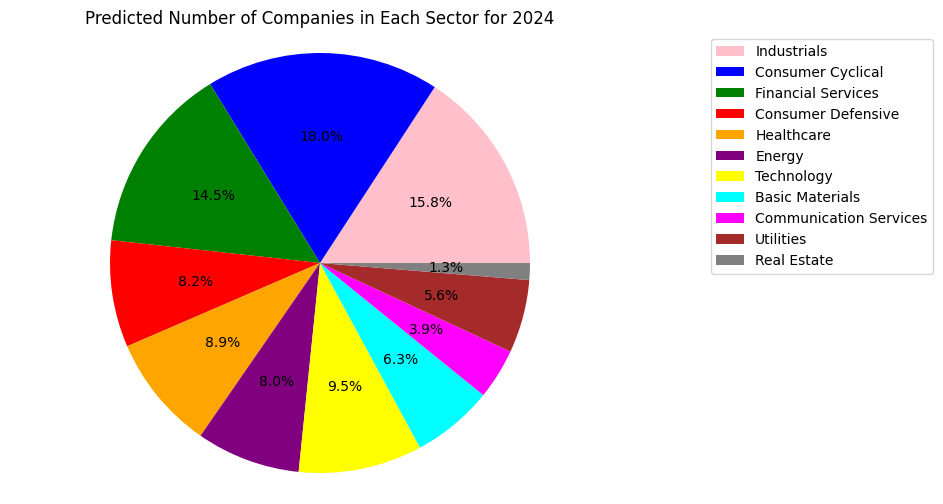

In [ ]:
# ML Analysis 1 continues...

# Concatenate sector_performance_by_year into a single DataFrame
combined_data = pd.concat(sector_performance_by_year, axis=1)

# Prepare the training data
X_train = combined_data.iloc[:, :-1]  # Features (counts of companies in each sector for years up to 2023)
y_train = combined_data.iloc[:, -1]   # Target (counts of companies in each sector for 2023)

# Initialize and train logistic regression model
logistic_reg = LogisticRegression(max_iter=1000)
logistic_reg.fit(X_train, y_train)

# Since we don't have data for 2024, let's assume X_train is data for 2024
predicted_performance_2024 = logistic_reg.predict(X_train)
sectors = combined_data.index

palette = ['pink', 'blue', 'green', 'red', 'orange', 'purple', 'yellow', 'cyan', 'magenta', 'brown', 'gray']

import matplotlib.pyplot as plt

# Plot a pie chart of predicted performance for 2024
plt.figure(figsize=(8, 6))
plt.pie(predicted_2024_df['Predicted Companies'], autopct='%1.1f%%', colors=palette)
plt.title('Predicted Number of Companies in Each Sector for 2024')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.legend(predicted_2024_df['Sector'], loc='best', bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

We conducted a machine learning analysis on a dataset spanning from 2011 to 2023, focusing on the sector performance of Fortune 500 companies, and predicted which sector has the most contribution to the Fortune 500 companies in 2024. From the data collected, we gathered Fortune 500 companies' sectors from 2011 to 2023 and created a pie chart for each year from 2011 to 2023. The data is initially concatenated across years, and logistic regression is employed to predict the number of companies in each sector for 2024 based on previous years' data. Additionally, the code generates a pie chart visualizing the predicted number of companies in each sector for 2024, providing a graphical representation of the sector-wise performance outlook. This approach could serve as a baseline model for predicting sector performance in the absence of 2024 data. The scaled predictions ensure that the sum of predicted companies across all sectors for 2024 remains constant. The pie chart visualization then presents the predicted distribution of companies across sectors for 2024. We tested our accuracy and we got 100 percent for all training set accuracy, validation set accuracy, and test set accuracy.

In [ ]:
#ML Analysis 2 (Dimitar)
# Read CSV files into DataFrames
data_2020 = pd.DataFrame(pd.read_csv(directory_path+'/Data_wStocks/rank_name_symbol_2020.csv'))
data_2021 = pd.DataFrame(pd.read_csv(directory_path+'/Data_wStocks/rank_name_symbol_2021.csv'))
data_2022 = pd.DataFrame(pd.read_csv(directory_path+'/Data_wStocks/rank_name_symbol_2022.csv'))
data_2023 = pd.DataFrame(pd.read_csv(directory_path+'/Data_wStocks/rank_name_symbol_2023.csv'))

In [ ]:
# Remove commas from the 'Profit' column
data_2020['Profit'] = data_2020.loc[:,'Profit'].str.replace(',', '')
data_2021['Profit'] = data_2021.loc[:,'Profit'].str.replace(',', '')
data_2022['Profit'] = data_2022.loc[:,'Profit'].str.replace(',', '')
data_2023['Profit'] = data_2023.loc[:,'Profit'].str.replace(',', '')

# Remove $ from the 'Profit' column
data_2020['Profit'] = data_2020.loc[:,'Profit'].str.replace('$', '')
data_2021['Profit'] = data_2021.loc[:,'Profit'].str.replace('$', '')
data_2022['Profit'] = data_2022.loc[:,'Profit'].str.replace('$', '')
data_2023['Profit'] = data_2023.loc[:,'Profit'].str.replace('$', '')

# Remove () from the 'Profit' column
data_2020['Profit'] = data_2020.loc[:,'Profit'].str.replace(')', '')
data_2021['Profit'] = data_2021.loc[:,'Profit'].str.replace(')', '')
data_2022['Profit'] = data_2022.loc[:,'Profit'].str.replace(')', '')
data_2023['Profit'] = data_2023.loc[:,'Profit'].str.replace(')', '')
data_2020['Profit'] = data_2020.loc[:,'Profit'].str.replace('(', '')
data_2021['Profit'] = data_2021.loc[:,'Profit'].str.replace('(', '')
data_2022['Profit'] = data_2022.loc[:,'Profit'].str.replace('(', '')
data_2023['Profit'] = data_2023.loc[:,'Profit'].str.replace('(', '')

# Convert the 'Profit' column to float
data_2020['Profit'] = data_2020.loc[:,'Profit'].astype(float)
data_2021['Profit'] = data_2021.loc[:,'Profit'].astype(float)
data_2022['Profit'] = data_2022.loc[:,'Profit'].astype(float)
data_2023['Profit'] = data_2023.loc[:,'Profit'].astype(float)

# Remove commas from the 'Revenue' column
data_2020['Revenue'] = data_2020.loc[:,'Revenue'].str.replace(',', '')
data_2021['Revenue'] = data_2021.loc[:,'Revenue'].str.replace(',', '')
data_2022['Revenue'] = data_2022.loc[:,'Revenue'].str.replace(',', '')
data_2023['Revenue'] = data_2023.loc[:,'Revenue'].str.replace(',', '')

# Remove $ from the 'Revenue' column
data_2020['Revenue'] = data_2020.loc[:,'Revenue'].str.replace('$', '')
data_2021['Revenue'] = data_2021.loc[:,'Revenue'].str.replace('$', '')
data_2022['Revenue'] = data_2022.loc[:,'Revenue'].str.replace('$', '')
data_2023['Revenue'] = data_2023.loc[:,'Revenue'].str.replace('$', '')

# Convert the 'Revenue' column to float
data_2020['Revenue'] = data_2020.loc[:,'Revenue'].astype(float)
data_2021['Revenue'] = data_2021.loc[:,'Revenue'].astype(float)
data_2022['Revenue'] = data_2022.loc[:,'Revenue'].astype(float)
data_2023['Revenue'] = data_2023.loc[:,'Revenue'].astype(float)


# Convert the Stocks columns to float
data_2020.loc[:, 'm1-o':'gdp-12'] = data_2020.loc[:, 'm1-o':'gdp-12'].astype(float)
data_2021.loc[:, 'm1-o':'gdp-12'] = data_2021.loc[:, 'm1-o':'gdp-12'].astype(float)
data_2022.loc[:, 'm1-o':'gdp-12'] = data_2022.loc[:, 'm1-o':'gdp-12'].astype(float)
data_2023.loc[:, 'm1-o':'gdp-12'] = data_2023.loc[:, 'm1-o':'gdp-12'].astype(float)


# Convert the columns of string type
data_2020.loc[:, 'Name':'Industry'] = data_2020.loc[:, 'Name':'Industry'].astype(str)
data_2021.loc[:, 'Name':'Industry'] = data_2021.loc[:, 'Name':'Industry'].astype(str)
data_2022.loc[:, 'Name':'Industry'] = data_2022.loc[:, 'Name':'Industry'].astype(str)
data_2023.loc[:, 'Name':'Industry'] = data_2023.loc[:, 'Name':'Industry'].astype(str)

In [ ]:
# Cleaning the data for the missing value
# Drop rows where any of the specified columns have null values
data_2020_cleaned = data_2020.dropna()
data_2021_cleaned = data_2021.dropna()
data_2022_cleaned = data_2022.dropna()
data_2023_cleaned = data_2023.dropna()

In [ ]:
#Reordering columns
numerical_2020 = data_2020_cleaned.loc[:, 'm1-o':'gdp-12']
numerical_2020['Revenue'] = data_2020_cleaned['Revenue']
numerical_2020['Profit'] = data_2020_cleaned['Profit']
categorical_2020 = data_2020_cleaned.loc[:, ['Ticker','Sector', 'Industry', 'Rank']]

numerical_2021 = data_2021_cleaned.loc[:, 'm1-o':'gdp-12']
numerical_2021['Revenue'] = data_2021_cleaned['Revenue']
numerical_2021['Profit'] = data_2021_cleaned['Profit']
categorical_2021 = data_2021_cleaned.loc[:, ['Ticker','Sector', 'Industry', 'Rank']]

numerical_2022 = data_2022_cleaned.loc[:, 'm1-o':'gdp-12']
numerical_2022['Revenue'] = data_2022_cleaned['Revenue']
numerical_2022['Profit'] = data_2022_cleaned['Profit']
categorical_2022 = data_2022_cleaned.loc[:, ['Ticker','Sector', 'Industry', 'Rank']]

numerical_2023 = data_2023_cleaned.loc[:, 'm1-o':'gdp-12']
numerical_2023['Revenue'] = data_2023_cleaned['Revenue']
numerical_2023['Profit'] = data_2023_cleaned['Profit']
categorical_2023 = data_2023_cleaned.loc[:, ['Ticker','Sector', 'Industry', 'Rank']]

In [ ]:
#Combining data
combined_2020 = pd.concat([categorical_2020, numerical_2020], axis=1)
combined_2021 = pd.concat([categorical_2021, numerical_2021], axis=1)
combined_2022 = pd.concat([categorical_2022, numerical_2022], axis=1)
combined_2023 = pd.concat([categorical_2023, numerical_2023], axis=1)
data = pd.concat([combined_2020, combined_2021, combined_2022, combined_2023], axis=0)

In [ ]:
from sklearn.model_selection import train_test_split

#Separating X and Y variables
X = data.loc[:, 'Rank':'Revenue']
Y = data.loc[:,'Profit']

# Splitting data into train and test sets (80% train, 20% test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Splitting train set into train and validation sets (60% train, 20% validation)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.25, random_state=42)

# Checking the shapes of the sets
print("Train set shape:", X_train.shape, Y_train.shape)
print("Validation set shape:", X_val.shape, Y_val.shape)
print("Test set shape:", X_test.shape, Y_test.shape)

Train set shape: (1062, 50) (1062,)
Validation set shape: (354, 50) (354,)
Test set shape: (354, 50) (354,)


In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, Y_train)

val_predict = lin_reg.predict(X_val)
test_predict = lin_reg.predict(X_test)

val_score = lin_reg.score(X_val, val_predict)
test_score = lin_reg.score(X_test, test_predict)

print("Validation Set Accuracy: "+ str(val_score))
print("Test Set Accuracy: "+ str(test_score))

Validation Set Accuracy: 1.0
Test Set Accuracy: 1.0


In this ML Analysis I am using the Rank, Sector, Industry, Revenue, Monthly Open-Close Stock Price (January-December), Monthly Unemployment Rate (January-December), Monthly GPD (January-December) as features, for each company with all the dataset from 2020-2023 combined into one. The target variable is the Profit for each company

**Reflection**

**What is the most challenging part of the project that you’ve encountered so far?**

- The most difficult part of the project so far has been collecting and cleaning the data.  Additionally, ensuring that the data is consistent, and free of errors or missing values requires careful attention to detail and strict data-cleaning procedures.

**What is your initial insight?**

- The initial insights for the projects are that manging financial data, and thinking about what factors to consider is an endless and ambitious jounrey all in itself. Additionally, much of the data, as we came to find out, is behind a paywall, so trying to acquire free data is something that is very challenging, but it forces one to find solution with minimal resources. The constraints force one to think creatively and outside the box especially when it comes to modelling.

**Are there any concrete results you can show at this point? If not, why not?**
- Yes, as shown and described above multiple visualizations are the result of our project so far. We believe that these visualizations are sufficient evidence that our goal for the project is going to be achieved and very similar to these visuals. Additionally, we are getting accustomed to building ML models that make interesting predictions. As we have shown above we are getting a pretty good accuracy estimation for our models so far. In the upcoming weeks we hope to gather more data and see what other predictions we can make

**Going forward, what are the current biggest problems you’re facing?**
- One thing that we need to work on is gathering stock data for the companies in our database from 2011-2019, since at the moment we only had the means to gather data from the years 2020-2023.

**Do you think you are on track with your project? If not, what parts do you need to dedicate more time to?**
- Overall, we are on track with our project. However, there is one aspect that requires additional attention: obtaining stock price data from 2011 to 2019. This time period is critical for our analysis because it covers a large portion of our dataset and provides important historical context for understanding market trends and company performance over time. As a result, spending more time collecting and incorporating stock price data into our analysis will be critical to ensure the completeness and accuracy of our predictive models.

**Given your initial exploration of the data, is it worth proceeding with your project, why? If not, how will you move forward (method, data etc)?**
- We believe that we have sufficient data and deep understanding now about the goal of our project and how we are going to complete it. We believe that we are still going to face some hiccups on the way when it comes to the ML model that predicts stock prices for fortune 500 companies by gathering all of the variables together. Right now, they are independently shown by a few graphs but combining one by one is going to be our approach moving forward.
